___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.3f' % x)



from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve

from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold

from imblearn.over_sampling import SMOTE


import matplotlib.gridspec as gridspec # to do the grid of plots

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [5]:
from deepchecks.tabular import Dataset
cat_cols = []
ds = Dataset(df, cat_features= cat_cols, label= 'Class')


deepchecks - WARNING - You are using deepchecks version 0.8.3, however a newer version is available.Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


In [6]:
#ds

In [ ]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Data Integrity Suite: 
 
 
 
 7/12 [Time: 00:26, Check=String Length Out Of Bounds]

## Amaç burada çıkan hataları düzeltip uyarıları dikkate alarak bunlarla mücadele edip bu suite'i tekrar çalıştırarak sonuçları yeniden değerlendirmek.

In [ ]:
df.drop(df.index[[219257, 229036,61709]], inplace = True)  
df.reset_index(inplace=True, drop=True)

### Duplicate samples, modelin bu örneklere verdiği ağırlığı artırır : Bu Duplicateler kasıtlı olarak oradaysa (örneğin,  veri kümesinin doğası gereği aynı görünümlü örneklere sahipse) bu geçerli olabilir

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.duplicated()]["Class"].value_counts()

# 1'leri kaybetmemek adına bunları drop etmiyoruz.

In [ ]:
# df.drop_duplicates(inplace=True)

In [ ]:
# df.reset_index(inplace=True)

In [ ]:
# df.drop(columns="index",inplace=True)

In [154]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0


In [ ]:
# from deepchecks.tabular import Dataset
# cat_cols = []
# ds = Dataset(df, cat_features= cat_cols, label= 'Class')


In [ ]:
# from deepchecks.tabular.suites import data_integrity

# # Run Suite:
# integ_suite = data_integrity()
# suite_result = integ_suite.run(ds)
# # Note: the result can be saved as html using suite_result.save_as_html()
# # or exported to json using suite_result.to_json()
# suite_result.show()

### Exploratory Data Analysis

In [10]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284799,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284800,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284801,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284802,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0


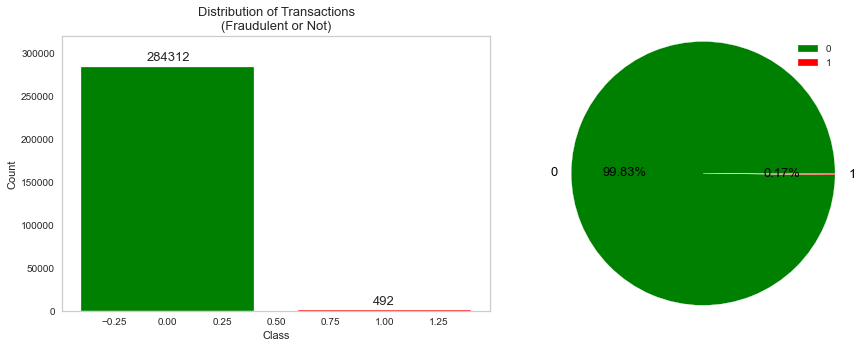

In [11]:
plt.figure(figsize=(13,5))

x = df['Class'].value_counts().index
y = df['Class'].value_counts().values

plt.subplot(121)
g = plt.bar(x, y, label='Class', color=['green','red'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 320000)

plt.xlabel('Class'), plt.ylabel('Count') 
plt.title('Distribution of Transactions\n(Fraudulent or Not)', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.2f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['green','red'])
plt.legend()

plt.tight_layout();

In [12]:
df['Class'].value_counts()

0    284312
1       492
Name: Class, dtype: int64

### Data'da 30 features(X) bulunduğundan Fraud'ların ne gibi farklılıkları olduğunu bulmak gerekir.

In [13]:
df.isnull().sum().sum()

0

In [14]:
print('Missing Value   : ', df.isnull().sum().sum())

Missing Value   :  0


In [15]:
non_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [16]:
fraud.shape

(492, 31)

In [17]:
fraud["Amount"].describe()

count    492.000
mean     122.211
std      256.683
min        0.000
25%        1.000
50%        9.250
75%      105.890
max     2125.870
Name: Amount, dtype: float64

## amount = 0 olan bir işlem nasıl fraud olabilir ? dolandırıcılar, kartın gizli ayrıntılarını güvenli olmayan web sitelerinden alabilir. eğer + bir kimlilk doğrulama işlemi varsa amount = 0 gözükür.

In [18]:
non_fraud["Amount"].describe()

count   284312.000
mean        88.275
std        250.016
min          0.000
25%          5.650
50%         22.000
75%         77.050
max      25691.160
Name: Amount, dtype: float64

## veri setindeki maximum amount non_fraud'muş.

In [19]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.016,0.009,-0.006,0.012,-0.008,0.005,0.002,0.010,-0.001,0.004,0.010,-0.007,0.011,0.000,0.012,0.000,0.007,0.012,0.004,-0.001,-0.001,-0.001,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,88.275
1,80746.807,-4.772,3.624,-7.033,4.542,-3.151,-1.398,-5.569,0.571,-2.581,-5.677,3.800,-6.259,-0.109,-6.972,-0.093,-4.140,-6.666,-2.246,0.681,0.372,0.714,0.014,-0.040,-0.105,0.041,0.052,0.171,0.076,122.211


### normal işlemlerdeki v'ler 0.00

## fraud olanlar için ortalama amount  daha fazladır.

## v'leri - olan ve 1'i geçenler : v(1 3 5 6 7 9 10 12 14 16 17 18)

## v'leri +  olan ve 1'i geçenler : v(2 4 11 )

In [20]:
print("Total Amount\t\t   : ", np.round(df.Amount.sum(), 3))
print("Fraud Amount\t\t   : ", np.round(fraud.Amount.sum(),3))
print("Non-Fraud Amount\t   : ", np.round(non_fraud.Amount.sum(), 3))
print("Percentage of Fraud Amount(%) : ", np.round((fraud.Amount.sum()/df.Amount.sum())*100, decimals=3))

Total Amount		   :  25157875.92
Fraud Amount		   :  60127.97
Non-Fraud Amount	   :  25097747.95
Percentage of Fraud Amount(%) :  0.239


###  V1-V28 featureları sıfır merkezlidir, ancak diğer iki fearure Time ve Amount  öyle değildir.

<AxesSubplot:>

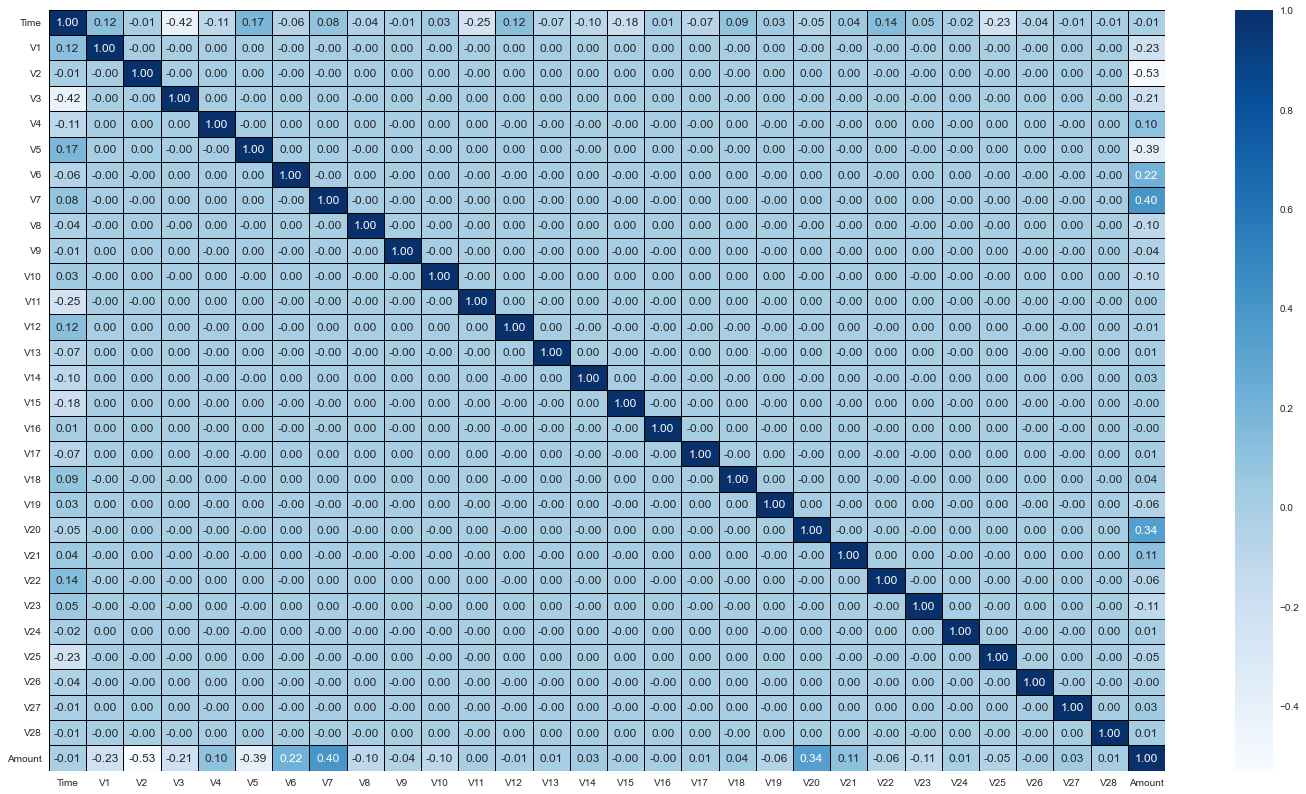

In [21]:
plt.figure(figsize=(25, 14))
sns.heatmap(df.drop('Class',1).corr(), annot=True, cmap='Blues', linewidth=1, linecolor='black', fmt='.2f')

## v7 - amount v-20 v2 v5 vs bunlara dikkat diğerlerinin 0 olmasının nedeni ?

### PCA SONUCUNDA ELDE EDİLEN PRİNCİPAL COMPONENTLER BİRBİRİNDEN TAMAMEN BAĞIMZSIDIR VE DOLAYISIYLA KORELASYONLARI YOKTUR.Dolayısıyla korelasyon analizine dayalı herhangi bir özelliği kaldırmamız gerekmiyor.

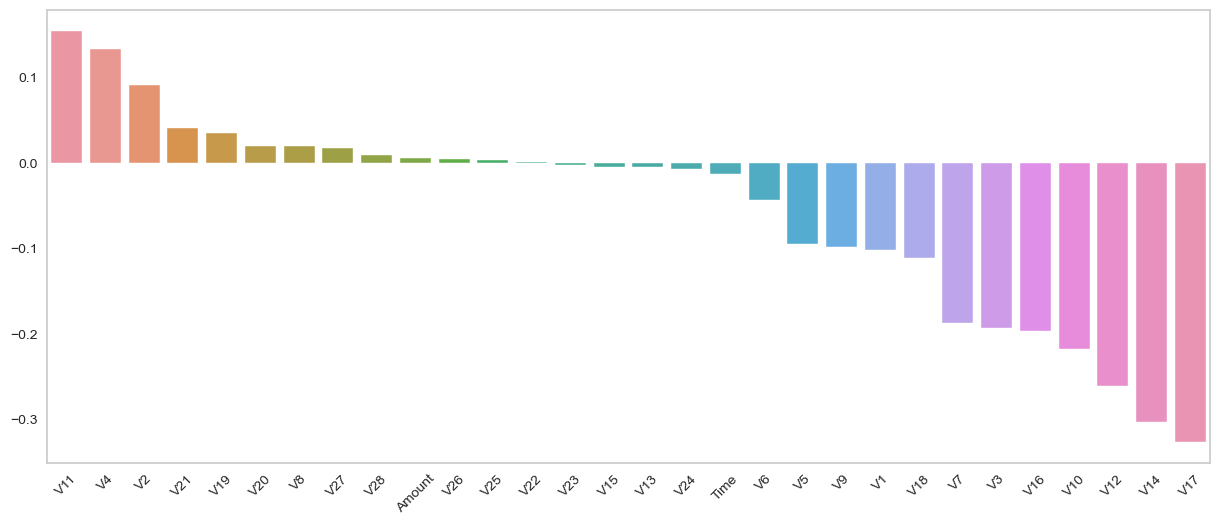

In [171]:
plt.figure(figsize = (15,6),dpi = 100)
sns.barplot(x = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).index,
            y = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).values)
plt.xticks(rotation = 45);

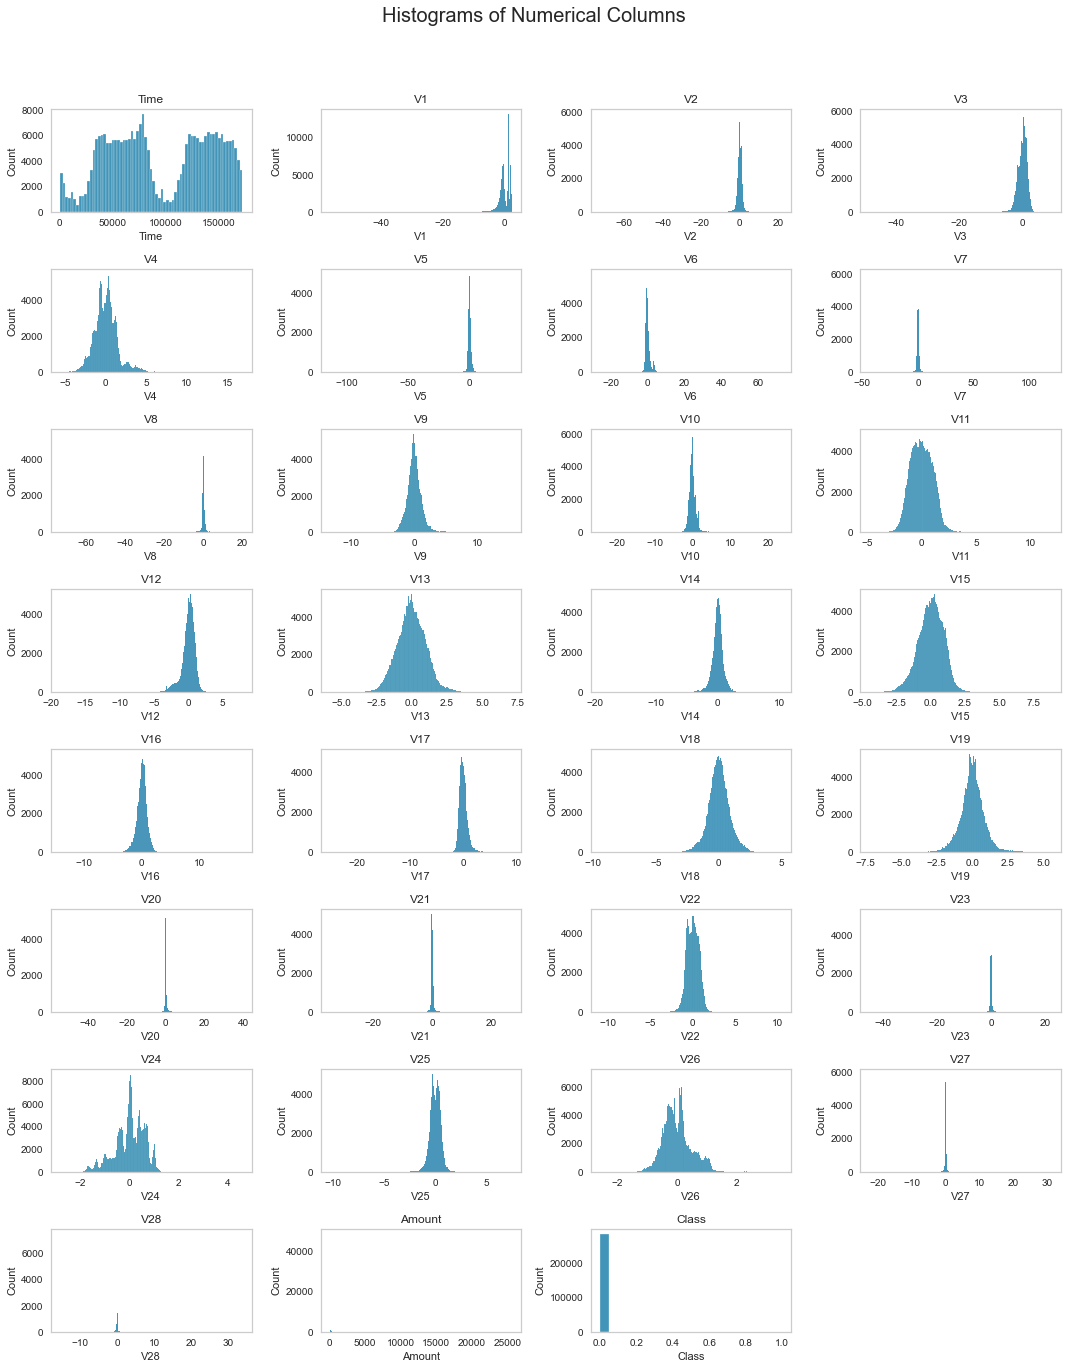

In [172]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(8, 4, i+1)
    f = plt.gca()
    f.set_title(df.columns.values[i])                                     
    sns.histplot(df.iloc[:, i])
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## dikkat [V1-V28] ARASINDAKİLER NEDEN COMPONENT'TİR :

#### 1- ) KORELASYONLARI 0
     2-) STANDARDİZASYON YAPILMIŞTIR ( Z-SCORE ) MEAN : 0 STD : 1 
     3-) HİSTOGRAMLARINA BAKTIĞIMIZDA Gauss dağılımındalar.
     4-) V'lerde missing value olmaması. PCA MİSSİNG VALUELARI KABUL ETMEZ 

## Bu nedenle, PCA dönüşümü ile dimension reduction tekrardan bu dataseetine YAPILAMAZ.
## feature selection yapabiliriz ama E.D.A sonucunda.

### biz V feature'larından bir inside elde edemeyiz amount ve time'a yoğunlaşmak daha iyi olacak.

In [173]:
df[["Time","Amount"]].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


### çoğu miktarın küçük olduğunu görebiliriz, ortalama yaklaşık 88 ve gözlemlerin orta yüzde 50'si 5 ile 77 arasındadır. En büyük değer yaklaşık 25.691'dir ve bu da dağılımı yukarı çeker ve aykırı değer olabilir (örneğin, birisi kredi kartıyla araba satın almış)

<AxesSubplot:xlabel='Amount'>

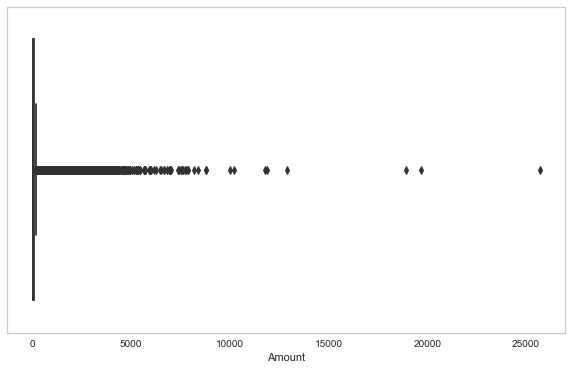

In [174]:
sns.boxplot(data=df, x='Amount')

<AxesSubplot:xlabel='Amount'>

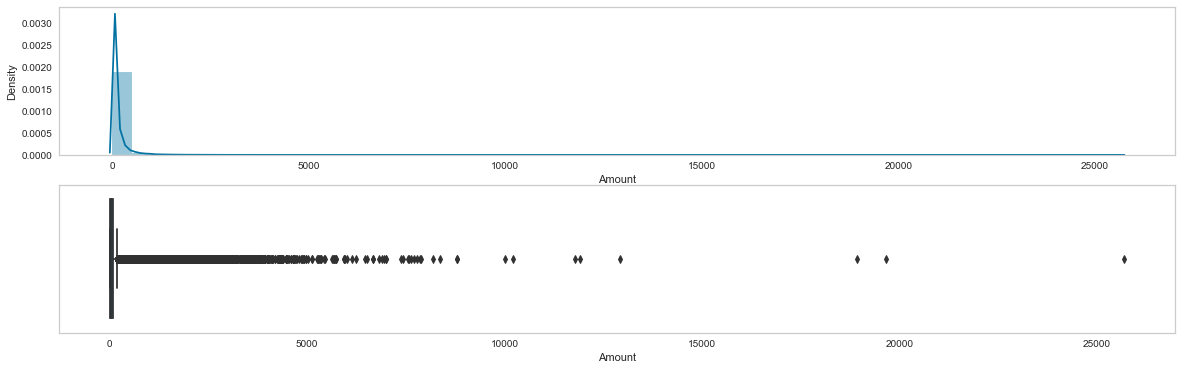

In [175]:
fig , (ax1,ax2)  = plt.subplots(2,1,figsize=(20,6))
sns.distplot(df["Amount"],ax = ax1)
sns.boxplot(df["Amount"],ax = ax2)

## Dağılım grafiğini ve kutu grafiğini çizdikten sonra, özelliğin büyük ölçüde sağa çarpık olduğunu ve çok sayıda ou'ya sahip olduğunu görebiliriz ve Bu, kredi kartı dolandırıcılık tespit modelini yanlış yönlendirebilir -

In [176]:
from scipy.stats import iqr

In [177]:
iqr(df["Amount"])

71.565

In [178]:
upper_limit = df["Amount"].quantile(0.75)  +(1.5 * iqr(df["Amount"]))
upper_limit

184.5125

In [179]:
df[df["Amount"] > upper_limit]["Class"].value_counts()

0    31813
1       91
Name: Class, dtype: int64

## amount özelliği üzerinde IQR analizi yaptığımızda bazı fraud verilerini kaybettiğimizi görebiliyoruz : *********

## 1.5 'u değiştirebiliriz unutmayalım.

## fraud sayım zaten az buna dikkat o yüzden kaldırmamalııyım. sadece class = 0 'ları kaldırsak ne olur buna da bir göz atalım.

In [22]:
df["Class"].value_counts()

0    284312
1       492
Name: Class, dtype: int64

### Data Cleaning
Check Missing Values and Outliers

In [23]:
df[df.Amount>=10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.000,-23.713,-42.173,-13.321,9.925,-13.946,5.565,15.711,-2.844,-1.581,-5.533,1.447,0.903,1.747,2.354,0.802,2.068,1.413,0.748,-3.637,26.237,7.922,-6.321,-11.310,0.404,-4.547,-1.577,-2.357,2.254,12910.930,0
54018,46253.000,-21.781,-38.305,-12.122,9.753,-12.881,4.256,14.785,-2.818,-0.667,-5.546,1.068,0.833,1.592,2.789,2.570,2.722,-0.614,3.491,-3.839,24.134,7.437,-5.619,-10.547,0.653,-4.232,-0.480,-2.258,2.082,11898.090,0
58465,48401.000,-36.802,-63.345,-20.646,16.716,-20.672,7.694,24.957,-4.730,-2.687,-8.423,1.186,1.880,3.497,4.083,1.406,0.773,0.903,5.041,-7.214,39.421,11.455,-10.933,-17.174,1.181,-7.026,-2.534,-3.602,3.450,19656.530,0
151295,95286.000,-34.549,-60.465,-21.341,16.875,-19.229,6.335,24.423,-4.965,0.189,-8.908,-0.084,-2.282,3.739,5.989,2.582,3.033,0.531,4.712,-6.938,38.117,11.503,-9.499,-16.513,0.744,-7.081,-2.605,-3.551,3.251,18910.000,0
169456,119713.000,-20.925,-37.943,-14.060,10.473,-10.867,6.257,14.961,-2.392,-0.597,-5.341,0.713,1.361,1.411,2.970,1.441,1.134,0.298,1.341,-4.392,23.649,6.830,-6.926,-9.929,-0.447,-4.848,-2.242,-2.141,2.001,11789.840,0
227919,145283.000,-21.532,-34.705,-8.303,10.264,3.957,-3.230,-4.067,-4.084,0.554,-2.167,0.940,3.109,0.809,4.110,3.017,0.554,1.175,0.601,-4.354,19.746,5.199,-7.331,-32.829,0.119,-8.697,-1.778,-0.520,2.717,10000.000,0
274768,166198.000,-35.549,-31.850,-48.326,15.304,-113.743,73.302,120.589,-27.347,-3.872,-12.005,6.854,-9.189,7.127,-6.796,8.878,17.315,-7.174,-1.968,5.502,-54.498,-21.620,5.712,-1.581,4.585,4.555,3.416,31.612,-15.430,25691.160,0
284246,172273.000,-9.031,-11.113,-16.234,3.592,-40.428,23.918,44.054,-7.278,-4.211,-7.776,0.214,-4.500,0.241,0.538,2.902,2.326,-0.402,1.257,2.008,2.455,-0.269,0.988,7.040,0.348,2.521,2.342,3.478,-2.713,10199.440,0


In [24]:
df2 = df.copy()

In [25]:
df["Class"].value_counts()

0    284312
1       492
Name: Class, dtype: int64

In [26]:
df = df[df.Amount<=10000]

In [27]:
df["Class"].value_counts()

0    284305
1       492
Name: Class, dtype: int64

## feature engineering

## 1-) Amount

## log ?

## 2-) Time

In [28]:
pd.to_timedelta(df['Time'], unit='S')

0        0 days 00:00:00
1        0 days 00:00:00
2        0 days 00:00:01
3        0 days 00:00:01
4        0 days 00:00:02
               ...      
284799   1 days 23:59:46
284800   1 days 23:59:47
284801   1 days 23:59:48
284802   1 days 23:59:48
284803   1 days 23:59:52
Name: Time, Length: 284797, dtype: timedelta64[ns]

### pandas.to_timedelta : içerisine verileni timedelta dtype'ına çeviriyor.unit = defaultu nanosecond ama biz s yazarsak second'a göre.

In [29]:
timedelta = pd.to_timedelta(df['Time'], unit='s')

In [30]:
timedelta.dt.components.minutes.astype(int)

0          0
1          0
2          0
3          0
4          0
          ..
284799    59
284800    59
284801    59
284802    59
284803    59
Name: minutes, Length: 284797, dtype: int32

In [31]:
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)

In [32]:
(timedelta.dt.components.hours).astype(int)

0          0
1          0
2          0
3          0
4          0
          ..
284799    23
284800    23
284801    23
284802    23
284803    23
Name: hours, Length: 284797, dtype: int32

In [33]:
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [34]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0,0,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0,0,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0,0,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0,0,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284799,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0,59,23
284800,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0,59,23
284801,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0,59,23
284802,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0,59,23


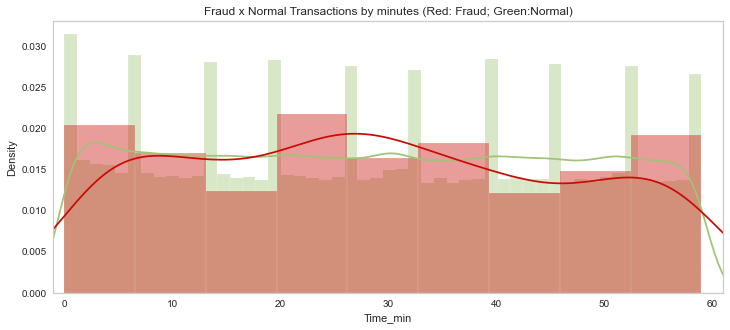

In [35]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_min"],
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_min"],
             color='r')
plt.title('Fraud x Normal Transactions by minutes (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,61])
plt.show()

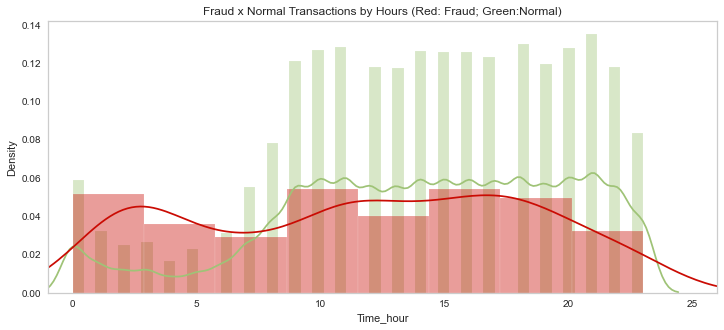

In [36]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"],
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"],
             color='r')
plt.title('Fraud x Normal Transactions by Hours (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,26])
plt.show()

## P.CA ile oluşturulmuş featurelardaki class'ların dağılımı.

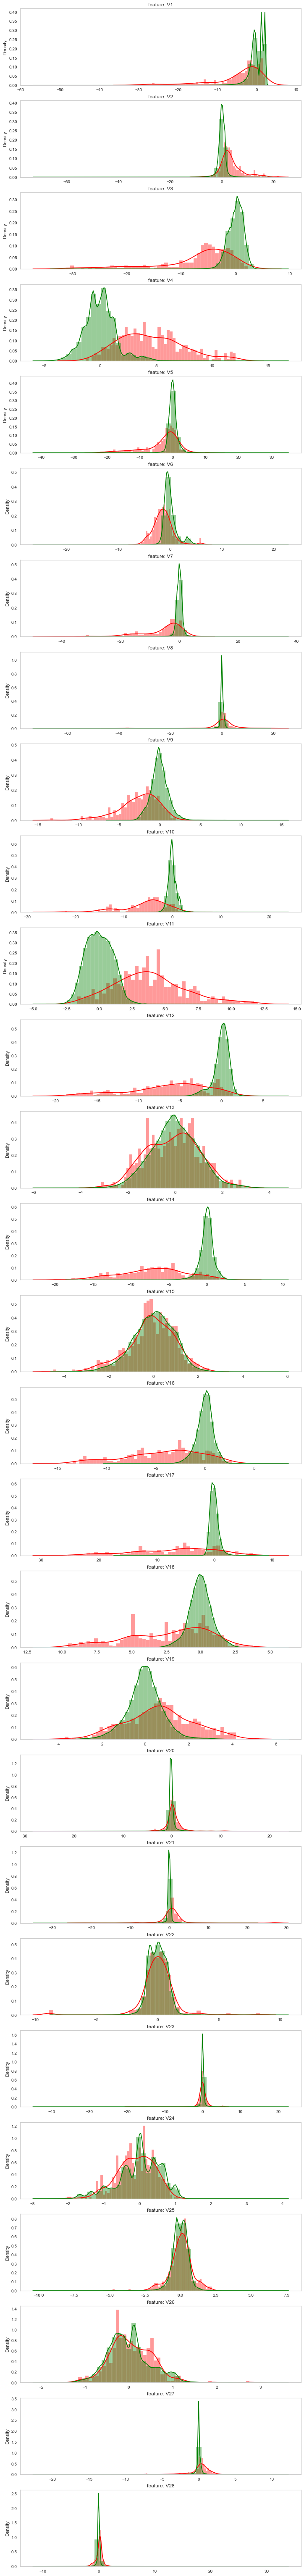

In [37]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[df.iloc[:, 1:29].columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,color="red")
    sns.distplot(df[cn][df.Class == 0], bins=50,color="green")
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [38]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0,0,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0,0,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0,0,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0,0,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284799,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0,59,23
284800,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0,59,23
284801,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0,59,23
284802,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0,59,23


In [39]:
df_select  = df.drop(['V1','V8','V13','V15','V20','V21','V22','V23','V24',"V19","V6",
                      'V25','V26','V27','V28',"Time_min","Time_hour"], axis =1)

In [42]:
df_select["Class"].value_counts()

0    284305
1       492
Name: Class, dtype: int64

In [43]:
df["Class"].value_counts()

0    284305
1       492
Name: Class, dtype: int64

In [50]:
#df_select.to_csv("selected.csv",index = False)

## 2. Data Preprocessing

In [51]:
df_s = pd.read_csv("selected.csv")
df_s

,Time,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Amount,Class
0,0.000,-0.073,2.536,1.378,-0.338,0.240,0.364,0.091,-0.552,-0.618,-0.311,-0.470,0.208,0.026,149.620,0
1,0.000,0.266,0.166,0.448,0.060,-0.079,-0.255,-0.167,1.613,1.065,-0.144,0.464,-0.115,-0.183,2.690,0
2,1.000,-1.340,1.773,0.380,-0.503,0.791,-1.515,0.208,0.625,0.066,-0.166,-2.890,1.110,-0.121,378.660,0
3,1.000,-0.185,1.793,-0.863,-0.010,0.238,-1.387,-0.055,-0.226,0.178,-0.288,-1.060,-0.684,1.966,123.500,0
4,2.000,0.878,1.549,0.403,-0.407,0.593,0.818,0.753,-0.823,0.538,-1.120,-0.451,-0.237,-0.038,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284792,172786.000,10.072,-9.835,-2.067,-5.364,-4.918,1.914,4.356,-1.593,2.712,4.627,1.108,1.992,0.511,0.770,0
284793,172787.000,-0.055,2.035,-0.739,0.868,0.024,0.585,-0.976,-0.150,0.916,-0.675,-0.712,-0.026,-1.221,24.790,0
284794,172788.000,-0.301,-3.250,-0.558,2.631,-0.297,0.432,-0.485,0.412,0.063,-0.511,0.141,0.314,0.396,67.880,0
284795,172788.000,0.530,0.703,0.690,-0.378,-0.686,0.392,-0.399,-1.934,-0.963,0.450,-0.609,0.510,1.114,10.000,0


#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [57]:
X = df_s.drop(columns=['Time','Class'], axis=1)
y = df_s['Class']

In [58]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [59]:
from deepchecks.tabular import Dataset


cat_cols = []

In [60]:
train_ds = Dataset(X_train, label=y_train, cat_features=cat_cols)
test_ds = Dataset(X_test, label=y_test, cat_features=cat_cols)

In [61]:
from deepchecks.tabular.suites import train_test_validation

res = train_test_validation().run(train_ds, test_ds)
res

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_WTYZ25PA85FKZ8VSIPW16KC8Q">Train …

## buradaki sorunları halledebilirsek halledeceğiz ama data çok unbalanced olduğundan bunu kabul de etmek gerekiyor. 

In [342]:
print('Class Ratio:',sum(df["Class"])/len(df['Class']))

Class Ratio: 0.0016671424895759537


In [343]:
y_train.value_counts(normalize=True)

0   0.998
1   0.002
Name: Class, dtype: float64

In [344]:
y_test.value_counts(normalize=True)

0   0.998
1   0.002
Name: Class, dtype: float64

In [345]:
y_test.value_counts()

0    56649
1       95
Name: Class, dtype: int64

In [35]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
y_train.value_counts()

0    227446
1       394
Name: Class, dtype: int64

In [212]:
227446 / 378

601.7089947089947

## Eğer bu  orana göre class_weight yaparsak precision'mız baya düşer bizim precision - recall arasındaki trade-off 'u da gözetiyor olmamız gerekiyor. FP'leri artırmak da bizi sıkıntıya düşürebilir çünkü..

## Bütün feature'ları kullanarak : 

In [96]:
operations = [("Scaler", RobustScaler()), ("log_model", LogisticRegression(class_weight={1:25,0:1},max_iter=10000,
                                                                          random_state=0))]

## amount sütunundaki outlier'lardan dolayı RobustScaler()'ı tercih ettik.

In [97]:
log_pipe_model = Pipeline(steps=operations)
log_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log_model',
                 LogisticRegression(class_weight={0: 1, 1: 25}, max_iter=10000,
                                    random_state=0))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.69      0.87      0.77        95

    accuracy                           1.00     56744
   macro avg       0.84      0.94      0.88     56744
weighted avg       1.00      1.00      1.00     56744




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.60      0.83      0.70       378

    accuracy                           1.00    226975
   macro avg       0.80      0.91      0.85    226975
weighted avg       1.00      1.00      1.00    226975



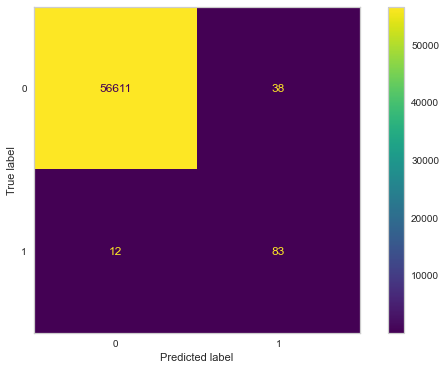

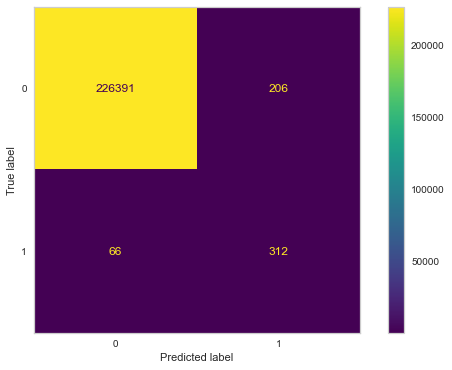

In [98]:
eval_metric(log_pipe_model, X_train, y_train, X_test, y_test)

### Logistic Model Cross Validation ( StratifiedKFold)

In [99]:
sKF = StratifiedKFold(n_splits=10,shuffle=True)       

In [100]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = sKF,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,1.774,0.023,0.538,0.641,0.737,0.841,0.622,0.728
2,1.947,0.031,0.642,0.599,0.895,0.821,0.747,0.692
3,1.744,0.031,0.547,0.609,0.763,0.829,0.637,0.702
4,1.916,0.020,0.588,0.605,0.789,0.824,0.674,0.697
5,1.625,0.016,0.596,0.594,0.895,0.824,0.716,0.691
6,1.600,0.016,0.589,0.588,0.892,0.821,0.710,0.685
7,1.578,0.016,0.635,0.602,0.892,0.824,0.742,0.696
8,1.483,0.016,0.627,0.592,0.842,0.829,0.719,0.691
9,1.549,0.016,0.659,0.604,0.711,0.835,0.684,0.701
10,1.506,0.031,0.640,0.617,0.842,0.832,0.727,0.708


In [101]:
df_scores.mean()[2:]

test_precision    0.606
train_precision   0.605
test_recall       0.826
train_recall      0.828
test_f1           0.698
train_f1          0.699
dtype: float64

## Logistic Model GridsearchCV

In [102]:
model = Pipeline(operations)


penalty = ["l1", "l2"]
C = np.logspace(-1, 2, 12)
solver = ['liblinear', 'lbfgs',"saga"]

param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__solver" : solver}

log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=sKF, n_jobs=-1)

In [103]:
log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', RobustScaler()),
                                       ('log_model',
                                        LogisticRegression(class_weight={0: 1,
                                                                         1: 25},
                                                           max_iter=10000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([  0.1       ,   0.18738174,   0.35111917,   0.65793322,
         1.23284674,   2.3101297 ,   4.32876128,   8.11130831,
        15.19911083,  28.48035868,  53.36699231, 100.        ]),
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='recall')

In [104]:
log_grid_model.best_estimator_

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log_model',
                 LogisticRegression(C=0.1, class_weight={0: 1, 1: 25},
                                    max_iter=10000, penalty='l1',
                                    random_state=0, solver='liblinear'))])

In [105]:
log_grid_model.best_params_

{'log_model__C': 0.1,
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [106]:
log_grid_model.best_score_

0.8145803698435277

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.69      0.87      0.77        95

    accuracy                           1.00     56744
   macro avg       0.84      0.94      0.88     56744
weighted avg       1.00      1.00      1.00     56744




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.60      0.83      0.70       378

    accuracy                           1.00    226975
   macro avg       0.80      0.91      0.85    226975
weighted avg       1.00      1.00      1.00    226975



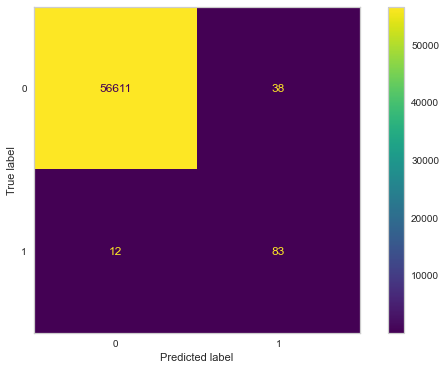

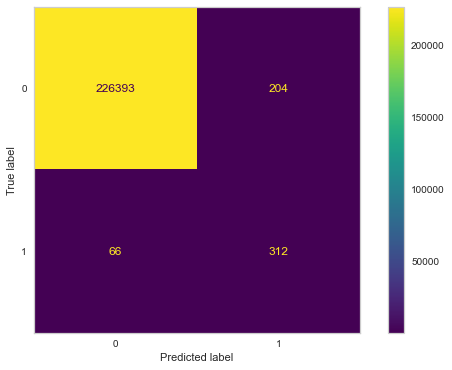

In [107]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

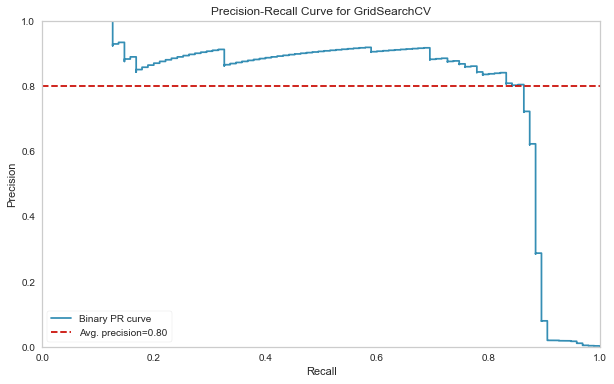

In [115]:
model = log_grid_model
viz = PrecisionRecallCurve(
    model,
    classes=log_grid_model.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();

In [117]:
viz.score_

0.798351885007723

### x2'leri kullanarak (Seçtiğimiz feature'ları kullanarak) :

In [137]:
X_train2

,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Amount
89841,1.566,1.114,0.032,-0.489,0.644,0.471,0.654,0.144,-0.592,-0.449,0.188,0.210,-0.216,8.990
188271,0.553,1.100,0.907,-1.119,-1.372,0.834,-0.611,-0.513,1.288,-0.261,0.475,-0.356,1.122,11.390
170235,0.951,-2.815,-2.116,3.419,0.553,-0.305,-0.042,-0.242,0.089,1.112,-0.638,-0.333,-0.500,9.170
251597,1.872,-0.168,-0.785,0.715,0.452,-0.510,-0.942,1.063,0.690,-0.814,0.461,0.304,1.148,15.770
224072,0.147,0.265,3.871,-0.361,-0.665,-0.106,1.389,-1.261,-0.766,-0.006,1.120,-0.682,0.023,12.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146796,-0.432,-0.596,0.118,-0.181,-0.743,0.819,0.178,0.520,1.207,-0.171,0.629,-0.973,0.596,5.990
38633,-4.170,-0.198,-1.103,-0.296,-1.498,-1.998,1.139,0.988,0.240,0.264,-0.499,0.567,0.086,991.220
149968,-1.085,-0.262,0.523,4.076,0.230,0.389,-0.251,1.069,-2.142,2.083,-0.115,-0.424,0.719,29.800
203010,-0.234,1.226,-0.067,2.135,-0.854,0.115,-0.369,-0.320,-0.165,-0.240,0.188,-0.535,0.836,100.000


In [215]:
operations = [("Scaler", RobustScaler()), ("log_model", LogisticRegression(class_weight={1:25,0:1},max_iter=10000,
                                                                          random_state=0))]

## amount sütunundaki outlier'lardan dolayı RobustScaler()'ı tercih ettik.

In [216]:
log_pipe_model = Pipeline(steps=operations)
log_pipe_model.fit(X_train2, y_train2)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log_model',
                 LogisticRegression(class_weight={0: 1, 1: 25}, max_iter=10000,
                                    random_state=0))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.64      0.84      0.73        98

    accuracy                           1.00     56960
   macro avg       0.82      0.92      0.86     56960
weighted avg       1.00      1.00      1.00     56960




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227446
           1       0.66      0.84      0.74       394

    accuracy                           1.00    227840
   macro avg       0.83      0.92      0.87    227840
weighted avg       1.00      1.00      1.00    227840



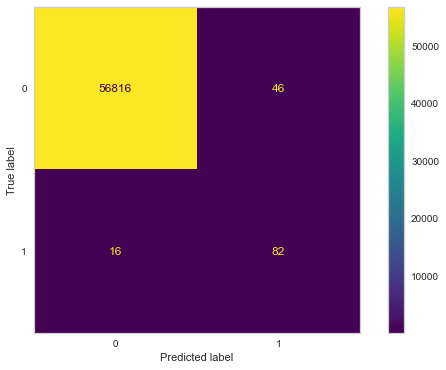

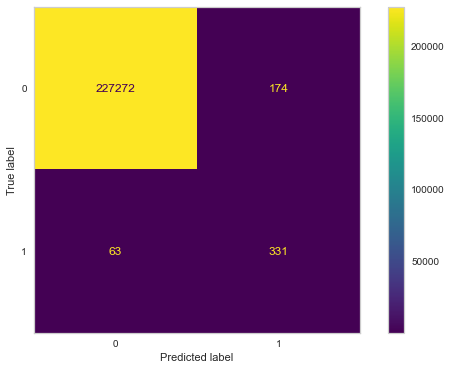

In [217]:
eval_metric(log_pipe_model, X_train2, y_train2, X_test2, y_test2)

### Logistic Model Cross Validation ( StratifiedKFold)

In [218]:
sKF = StratifiedKFold(n_splits=10,shuffle=True)       

In [219]:
model = Pipeline(operations)
scores = cross_validate(model, X_train2, y_train2, scoring = ['precision','recall','f1'], cv = sKF,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,1.879,0.073,0.659,0.667,0.744,0.851,0.699,0.748
2,1.917,0.067,0.696,0.660,0.821,0.848,0.753,0.742
3,1.911,0.064,0.680,0.636,0.872,0.842,0.764,0.725
4,1.742,0.059,0.700,0.647,0.897,0.842,0.787,0.732
5,1.837,0.055,0.694,0.653,0.872,0.837,0.773,0.733
6,1.976,0.066,0.525,0.648,0.795,0.845,0.633,0.733
7,1.953,0.068,0.614,0.664,0.875,0.842,0.722,0.742
8,1.864,0.072,0.694,0.646,0.850,0.839,0.764,0.730
9,2.017,0.067,0.667,0.643,0.800,0.845,0.727,0.730
10,1.930,0.060,0.538,0.653,0.875,0.836,0.667,0.734


In [220]:
df_scores.mean()[2:]

test_precision    0.647
train_precision   0.652
test_recall       0.840
train_recall      0.843
test_f1           0.729
train_f1          0.735
dtype: float64

## Logistic Model GridsearchCV

In [221]:
model = Pipeline(operations)


penalty = ["l1", "l2"]
C = np.logspace(-1, 2, 12)
solver = ['liblinear', 'lbfgs',"saga"]

param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__solver" : solver}

log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=sKF, n_jobs=-1)

In [222]:
log_grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', RobustScaler()),
                                       ('log_model',
                                        LogisticRegression(class_weight={0: 1,
                                                                         1: 25},
                                                           max_iter=10000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([  0.1       ,   0.18738174,   0.35111917,   0.65793322,
         1.23284674,   2.3101297 ,   4.32876128,   8.11130831,
        15.19911083,  28.48035868,  53.36699231, 100.        ]),
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='recall')

In [223]:
log_grid_model.best_estimator_

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log_model',
                 LogisticRegression(C=0.1, class_weight={0: 1, 1: 25},
                                    max_iter=10000, penalty='l1',
                                    random_state=0, solver='liblinear'))])

In [224]:
log_grid_model.best_params_

{'log_model__C': 0.1,
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [225]:
log_grid_model.best_score_

0.8403846153846153

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.64      0.84      0.73        98

    accuracy                           1.00     56960
   macro avg       0.82      0.92      0.86     56960
weighted avg       1.00      1.00      1.00     56960




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227446
           1       0.66      0.84      0.74       394

    accuracy                           1.00    227840
   macro avg       0.83      0.92      0.87    227840
weighted avg       1.00      1.00      1.00    227840



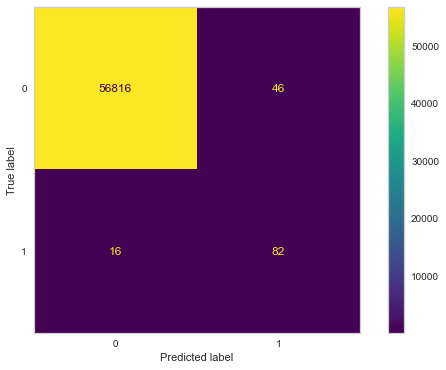

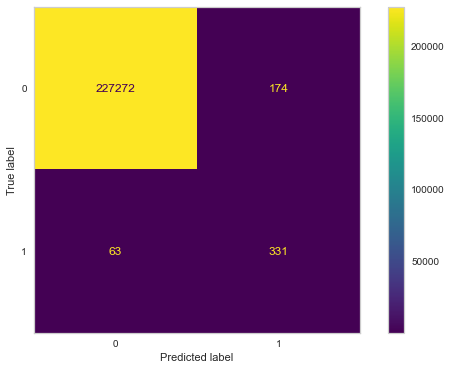

In [226]:
eval_metric(log_grid_model, X_train2, y_train2, X_test2, y_test2)

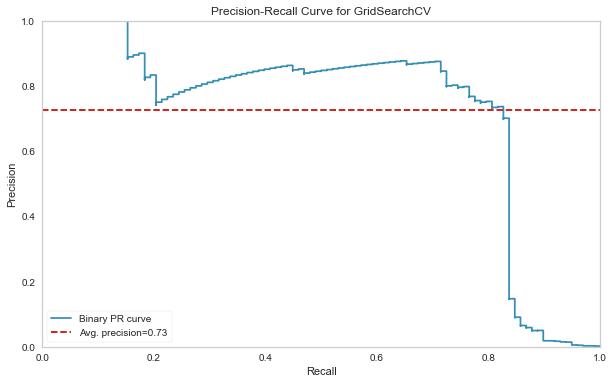

In [227]:
model = log_grid_model
viz = PrecisionRecallCurve(
    model,
    classes=log_grid_model.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train2,y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [228]:
viz.score_

0.7260334184340067

## Finding Best Threshold for max recall score (grid-search'ten aldığımız parametrelerle yeni bir model tanımlayarak bunu yapacağız.)

In [229]:
operations_th = [("Scaler", RobustScaler()), ("log_model", LogisticRegression(class_weight={1:25,0:1},max_iter=10000,
                                                                          random_state=0))]

In [230]:
log_pipe_model_th = Pipeline(steps=operations_th)
log_pipe_model_th.fit(X_train2, y_train2)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log_model',
                 LogisticRegression(class_weight={0: 1, 1: 25}, max_iter=10000,
                                    random_state=0))])

In [231]:
y_pred_proba = log_pipe_model_th.predict_proba(X_train2)
precisions, recalls, thresholds = precision_recall_curve(y_train2, y_pred_proba[:,1])

## recall için threshold belirliyoruz burada dikkat  : precision düşük çıkarsa ama f1 score yapabiliriz. (FP ) sayısını azaltmak adına.

In [232]:
optimal_idx = np.argmax(recalls)         # precisionlarım çok düşük gelirse burayı f1 yapmalıyım.
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

1.9186358888715474e-09

In [233]:
# test scores
y_pred = pd.Series(log_pipe_model_th.predict_proba(X_test2)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_test2,y_pred))
print(classification_report(y_test2,y_pred))

[[    0 56862]
 [    0    98]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56862
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56960
   macro avg       0.00      0.50      0.00     56960
weighted avg       0.00      0.00      0.00     56960



In [234]:
# train scores
y_train_pred = pd.Series(log_pipe_model_th.predict_proba(X_train)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_train2, y_train_pred))
print(classification_report(y_train2, y_train_pred))

ValueError: X has 29 features, but RobustScaler is expecting 14 features as input.

## Feature Selection For Logistic Regression

***ii. Model Training***

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

## trainds2 ****

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

***ii. Model Training***

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iv.  Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### trainds2

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___